In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,auc,accuracy_score
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
con = sqlite3.connect("database.sqlite") 
filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import pickle
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"))
def openfromfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [4]:
filtered_data


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [6]:
import nltk
nltk.download('stopwords')
sno=nltk.stem.SnowballStemmer('english')
stop = set(stopwords.words('english'))
def cleanhtml(sentence):
  cleanr=re.compile('<.*?>')
  cleantext=re.sub(cleanr,' ',sentence)
  return cleantext
def cleanpunc(sentence):
  cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned) 
  return cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"haven't", "didn't", "hasn't", 'where', 'an', 'couldn', "needn't", "won't", 'yourself', 'wasn', 'other', 'only', 'in', 'if', "doesn't", 'why', 'won', 'again', "it's", 'against', "mightn't", "couldn't", "she's", 'those', 've', "wasn't", 'during', "you've", 'should', "that'll", 's', 'whom', 'now', 'with', "mustn't", 'we', 'very', 'is', 'me', 'll', 'which', 'them', 'isn', 'some', 'mightn', 'having', 'few', 'up', "you'd", 'off', 'o', 'are', "don't", 'you', 'of', 'out', 'they', 'him', "wouldn't", 'don', 'been', 'wouldn', 'each', "hadn't", 'aren', 'his', "should've", 'had', 'am', 'until', 'my', 'their', 'between', 'what', 'no', 'm', 'doing', 'as', 'and', 'both', 'to', 'she', 'before', 'was', "you're", "isn't", 'the', 'were', 'be', 'haven', 'on', 'y', 'being', 'did', 'too', "weren't", 'over', 'your', 'while', 'then', 'all', 'there', 

In [7]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final = sorted_data.drop_duplicates(subset= { 'UserId', 'ProfileName', 'Time',  'Text'})

In [8]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

# Time based splitting

In [9]:
import datetime
from tqdm import tqdm

In [10]:
final['Time'] = final['Time'].map(lambda t:datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S'))

In [11]:
final["Time"].head()

138706    1999-10-08 05:30:00
138688    2007-11-11 05:30:00
138689    2007-10-04 05:30:00
138690    2004-02-06 05:30:00
138691    2002-04-10 05:30:00
Name: Time, dtype: object

In [12]:
final=final.sort_values('Time',axis=0,kind="quicksort", ascending=True).reset_index(drop=True)

In [13]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in tqdm(final['Text'].values):
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1
      
  


100%|█████████████████████████████████████████████████████████████████████████| 364171/364171 [21:15<00:00, 285.43it/s]


In [14]:
savetofile(final_string,"final_string")

In [17]:
len(final_string)

364171

In [18]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [19]:
final_sample_svm=final['CleanedText'].values[0:200000]
final_score_svm=final['Score'].values[0:200000]

In [89]:
final_sample_svc=final['CleanedText'].values[0:50000]
final_score_svc=final['Score'].values[0:50000]

In [21]:
freq_dist_positive=nltk.FreqDist(all_positive_words)
freq_dist_negative=nltk.FreqDist(all_negative_words)
print("Most Common Positive Words : ",freq_dist_positive.most_common(20))
print("Most Common Negative Words : ",freq_dist_negative.most_common(20))

Most Common Positive Words :  [(b'like', 139429), (b'tast', 129047), (b'good', 112766), (b'flavor', 109624), (b'love', 107357), (b'use', 103888), (b'great', 103870), (b'one', 96726), (b'product', 91033), (b'tri', 86791), (b'tea', 83888), (b'coffe', 78814), (b'make', 75107), (b'get', 72125), (b'food', 64802), (b'would', 55568), (b'time', 55264), (b'buy', 54198), (b'realli', 52715), (b'eat', 52004)]
Most Common Negative Words :  [(b'tast', 34585), (b'like', 32330), (b'product', 28218), (b'one', 20569), (b'flavor', 19575), (b'would', 17972), (b'tri', 17753), (b'use', 15302), (b'good', 15041), (b'coffe', 14716), (b'get', 13786), (b'buy', 13752), (b'order', 12871), (b'food', 12754), (b'dont', 11877), (b'tea', 11665), (b'even', 11085), (b'box', 10844), (b'amazon', 10073), (b'make', 9840)]


# FUNCTION FOR SVM

In [149]:

from sklearn import svm
def SVMCLASSIFIER(X_train,Y_train,X_test,Y_test,optimalgamma,C_optimum):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

    clf = svm.SVC(gamma=optimalgamma,C=C_optimum,kernel='rbf',class_weight="balanced")
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    print(' accuracy with C =',C_optimum,' is ' ,np.round((accuracy_score(Y_test, pred)*100),decimals = 2))
    print('F1 score with C =',C_optimum,' is ' , np.round((f1_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Recall with C =',C_optimum,' is ' , np.round((recall_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Precision with C =',C_optimum,' is ' , np.round((precision_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print ('\n Classification report  with C =',C_optimum,' is \n ' , classification_report(Y_test,pred)) 
   
    df_cm = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 18}, fmt='g')
    print("****************************")
    print("TRAINING SCORE IS:",clf.score(X_train,Y_train))
    print("****************************")
    print("TEST SCORE IS:",clf.score(X_test,Y_test))

In [150]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
def LinearCLASSIFIER(X_train,Y_train,X_test,Y_test):
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    clf = SGDClassifier(loss='hinge', penalty='l2',class_weight="balanced")
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    print(' accuracy  = is ' ,np.round((accuracy_score(Y_test, pred)*100),decimals = 2))
    print('F1 score = is ' , np.round((f1_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Recall = is ' , np.round((recall_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Precision  = is ' , np.round((precision_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print ('\n Classification report  = is \n ' , classification_report(Y_test,pred)) 
    print('no. of non zero elements =',np.count_nonzero(clf.coef_))
    df_cm = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 18}, fmt='g')
    print("****************************")
    print("TRAINING SCORE IS:",clf.score(X_train,Y_train))
    print("****************************")
    print("TEST SCORE IS:",clf.score(X_test,Y_test))
    
    

# GRID SEARCH CV

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
def bestParam(X_train,Y_train,X_test,Y_test):
    
    
  
    clf=SVC(kernel='rbf',class_weight="balanced")
    param_grids = {'C': [1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],'gamma': [1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
    gsv= GridSearchCV(clf,param_grids,verbose=1,n_jobs=-1)
    gsv.fit(X_train,Y_train)
    return gsv.best_params_

# Random SEARCH CV

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

def bestParamR(X_train,Y_train,X_test,Y_test):
    
    clf=SVC(kernel='rbf',class_weight="balanced")
    param_grids = {'C': [1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],'gamma': [1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
    rsv=  RandomizedSearchCV(clf,param_grids,verbose=1,n_jobs=-1)
    rsv.fit(X_train,Y_train)
    return rsv.best_params_

# Bag of words -(LINEAR CLASSIFIER)

In [26]:
from sklearn.model_selection import train_test_split
X_train_svm,X_test_svm,Y_train_svm,Y_test_svm=train_test_split(final_sample_svm,final_score_svm,test_size=0.3,shuffle=False)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,1))
Vocabulary = count_vect.fit_transform(X_train_svm)


In [28]:
bow_X_train_svm=count_vect.transform(X_train_svm)
bow_X_test_svm=count_vect.transform(X_test_svm)

In [29]:
from sklearn import preprocessing 
bow_X_train_svm= preprocessing.normalize(bow_X_train_svm)
bow_X_test_svm = preprocessing.normalize(bow_X_test_svm)


 accuracy  = is  86.22
F1 score = is  79.15
Recall = is  86.52
Precision  = is  75.84

 Classification report  = is 
               precision    recall  f1-score   support

   negative       0.55      0.87      0.67      9657
   positive       0.97      0.86      0.91     50343

avg / total       0.90      0.86      0.87     60000

no. of non zero elements = 34974
****************************
TRAINING SCORE IS: 0.8778714285714285
****************************
TEST SCORE IS: 0.8622


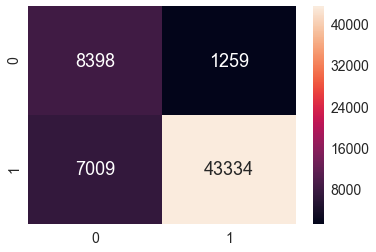

In [151]:
LinearCLASSIFIER(bow_X_train_svm,Y_train_svm,bow_X_test_svm,Y_test_svm)

# KERNEL CLASSIFIER for BOW

In [122]:
X_train_svc,X_test_svc,Y_train_svc,Y_test_svc=train_test_split(final_sample_svc,final_score_svc,test_size=0.3,shuffle=False)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,1))
Vocabulary = count_vect.fit_transform(X_train_svc)


In [124]:
bow_X_train_svc=count_vect.transform(X_train_svc)
bow_X_test_svc=count_vect.transform(X_test_svc)

In [125]:
from sklearn import preprocessing 
bow_X_train_svc= preprocessing.normalize(bow_X_train_svc)
bow_X_test_svc = preprocessing.normalize(bow_X_test_svc)


In [130]:
Y_train_svc.shape

(35000,)

# best parameter with random search cv

In [135]:
BestHyperparametersvmR = bestParamR(bow_X_train_svc,Y_train_svc,bow_X_test_svc,Y_test_svc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 104.0min finished


In [136]:
print(BestHyperparametersvmR)

{'gamma': 1, 'C': 1}


# Kernel svm for bow

 accuracy with C = 1  is  92.61
F1 score with C = 1  is  81.13
Recall with C = 1  is  79.08
Precision with C = 1  is  83.63

 Classification report  with C = 1  is 
               precision    recall  f1-score   support

   negative       0.72      0.61      0.66      1787
   positive       0.95      0.97      0.96     13213

avg / total       0.92      0.93      0.92     15000

****************************
TRAINING SCORE IS: 0.9902857142857143
****************************
TEST SCORE IS: 0.9260666666666667


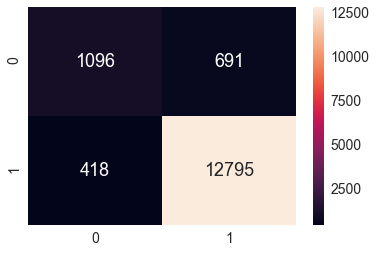

In [152]:
SVMCLASSIFIER(bow_X_train_svc,Y_train_svc,bow_X_test_svc,Y_test_svc,1,1) #randomsearchcv 

## Linear Classifier for TFIDF

In [154]:
from sklearn.model_selection import train_test_split
X_train_svm,X_test_svm,Y_train_svm,Y_test_svm=train_test_split(final_sample_svm,final_score_svm,test_size=0.3,shuffle=False)

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
Vocabulary = tfidf_vect.fit_transform(X_train_svm)


In [156]:
tfidf_X_train_svm=tfidf_vect.transform(X_train_svm)
tfidf_X_test_svm=tfidf_vect.transform(X_test_svm)

In [157]:
from sklearn import preprocessing 
tfidf_X_train_svm= preprocessing.normalize(tfidf_X_train_svm)
tfidf_X_test_svm = preprocessing.normalize(tfidf_X_test_svm)

 accuracy  = is  85.84
F1 score = is  79.03
Recall = is  87.37
Precision  = is  75.65

 Classification report  = is 
               precision    recall  f1-score   support

   negative       0.54      0.90      0.67      9657
   positive       0.98      0.85      0.91     50343

avg / total       0.91      0.86      0.87     60000

no. of non zero elements = 36325
****************************
TRAINING SCORE IS: 0.8764357142857143
****************************
TEST SCORE IS: 0.8583666666666666


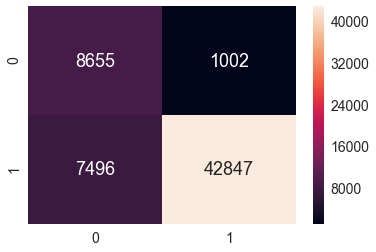

In [158]:
LinearCLASSIFIER(tfidf_X_train_svm,Y_train_svm,tfidf_X_test_svm,Y_test_svm)

# KERNEL CLASSIFIER FOR TFIDF

In [112]:
X_train_svc,X_test_svc,Y_train_svc,Y_test_svc=train_test_split(final_sample_svc,final_score_svc,test_size=0.3,shuffle=False)

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
Vocabulary = tfidf_vect.fit_transform(X_train_svc)


In [114]:
tfidf_X_train_svc=tfidf_vect.transform(X_train_svc)
tfidf_X_test_svc=tfidf_vect.transform(X_test_svc)

In [115]:
from sklearn import preprocessing 
tfidf_X_train_svc= preprocessing.normalize(tfidf_X_train_svc)
tfidf_X_test_svc = preprocessing.normalize(tfidf_X_test_svc)

In [160]:
tfidf_X_train_svc.shape

(35000, 23049)

# Randomized search cv

In [119]:
BestHyperparameter = bestParamR(tfidf_X_train_svc,Y_train_svc,tfidf_X_test_svc,Y_test_svc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 107.7min finished


In [120]:
print(BestHyperparameter)

{'gamma': 0.1, 'C': 10}


# KERNEL  CLASSIFIER FOR TFIDF

 accuracy with C = 10  is  90.12
F1 score with C = 10  is  78.71
Recall with C = 10  is  81.86
Precision with C = 10  is  76.39

 Classification report  with C = 10  is 
               precision    recall  f1-score   support

   negative       0.57      0.71      0.63      1787
   positive       0.96      0.93      0.94     13213

avg / total       0.91      0.90      0.91     15000

****************************
TRAINING SCORE IS: 0.9626571428571429
****************************
TEST SCORE IS: 0.9012


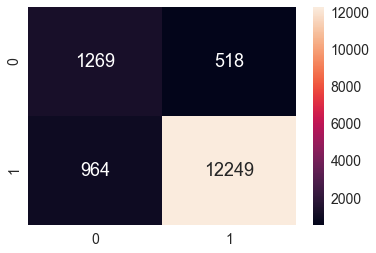

In [161]:
SVMCLASSIFIER(tfidf_X_train_svc,Y_train_svc,tfidf_X_test_svc,Y_test_svc,0.1,10)#random search

# Word 2 vec

In [22]:
i=0
list_of_sent1=[]
for sent in tqdm(final['CleanedText'].values):
    
    list_of_sent1.append(sent.split())

100%|███████████████████████████████████████████████████████████████████████| 364171/364171 [00:25<00:00, 14445.05it/s]


100%|█████████████████████████████████████████████████████████████████████████| 364171/364171 [31:57<00:00, 189.89it/s]


In [23]:
w2v_model = gensim.models.Word2Vec(list_of_sent1,min_count=5,size=50, workers=4)

In [24]:
w2v_model.most_similar("like")

[('weird', 0.7466596364974976),
 ('okay', 0.7184625267982483),
 ('prefer', 0.6972460150718689),
 ('dislik', 0.6954931020736694),
 ('appeal', 0.6868051290512085),
 ('think', 0.6538505554199219),
 ('fake', 0.647203803062439),
 ('funki', 0.6445770859718323),
 ('gross', 0.6426984071731567),
 ('strang', 0.6425809860229492)]

In [25]:
w2v_words = list(w2v_model.wv.vocab)


In [27]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent1): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 364171/364171 [10:37<00:00, 571.60it/s]


364171
50


# LINEAR SVM FOR AVG WORD2VEC

In [166]:
final_w2v_sample = np.array(sent_vectors)
final_w2v_sample_svm=final_w2v_sample[0:200000]

from sklearn.model_selection import train_test_split
X_train_svm,X_test_svm,Y_train_svm,Y_test_svm=train_test_split(final_w2v_sample_svm,final_score_svm,test_size=0.3,shuffle=False)

In [167]:
from sklearn import preprocessing 
avgw2v_X_train_svm= preprocessing.normalize(X_train_svm)
avgw2v_X_test_svm = preprocessing.normalize(X_test_svm)

 accuracy  = is  81.81
F1 score = is  74.32
Recall = is  83.65
Precision  = is  71.68

 Classification report  = is 
               precision    recall  f1-score   support

   negative       0.46      0.86      0.60      9657
   positive       0.97      0.81      0.88     50343

avg / total       0.89      0.82      0.84     60000

no. of non zero elements = 50
****************************
TRAINING SCORE IS: 0.8309142857142857
****************************
TEST SCORE IS: 0.81805


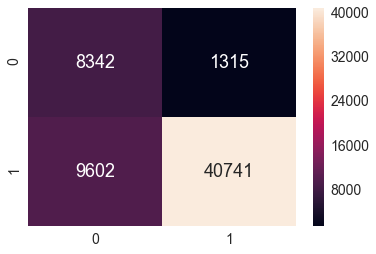

In [168]:
LinearCLASSIFIER(avgw2v_X_train_svm,Y_train_svm,avgw2v_X_test_svm,Y_test_svm)

# KERNEL CLASSIFIER FOR SVM

In [61]:
sent_vectors=openfromfile("sent_vectors")

In [100]:
final_w2v_sample = np.array(sent_vectors)
final_w2v_sample_svm=final_w2v_sample[0:200000]
final_w2v_sample_svc=final_w2v_sample[0:50000]

In [101]:
X_train_svc,X_test_svc,Y_train_svc,Y_test_svc=train_test_split(final_w2v_sample_svc,final_score_svc,test_size=0.3,shuffle=False)

In [102]:
from sklearn import preprocessing 
avgw2v_X_train_svc= preprocessing.normalize(X_train_svc)
avgw2v_X_test_svc = preprocessing.normalize(X_test_svc)

In [104]:
len(avgw2v_X_train_svc)

35000

# Random search cv

In [105]:
BestHyperparameterR = bestParamR(avgw2v_X_train_svc,Y_train_svc,avgw2v_X_test_svc,Y_test_svc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 51.1min finished


In [106]:
print(BestHyperparameterR)

{'gamma': 0.5, 'C': 1000}


# kernel SVM for Average Word2vec

 accuracy with C = 1000  is  89.31
F1 score with C = 1000  is  74.13
Recall with C = 1000  is  73.75
Precision with C = 1000  is  74.53

 Classification report  with C = 1000  is 
               precision    recall  f1-score   support

   negative       0.55      0.53      0.54      1787
   positive       0.94      0.94      0.94     13213

avg / total       0.89      0.89      0.89     15000

****************************
TRAINING SCORE IS: 0.9991142857142857
****************************
TEST SCORE IS: 0.8931333333333333


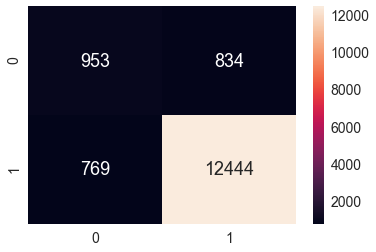

In [162]:
SVMCLASSIFIER(avgw2v_X_train_svc,Y_train_svc,avgw2v_X_test_svc,Y_test_svc,0.5,1000) #random search cv

# TFIDF WORD 2 Vec

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [31]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [32]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent1): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|█████████████████████████████████████████████████████████████████████████| 364171/364171 [11:57<00:00, 507.65it/s]


In [71]:
tfidf_sent_vectors=openfromfile("tfidf_sent_vectors")

In [90]:
final_tfidf_sample_svm=tfidf_sent_vectors[0:200000]
final_tfidf_sample_svc=tfidf_sent_vectors[0:50000]


In [211]:
from sklearn.model_selection import train_test_split
X_train_svm,X_test_svm,Y_train_svm,Y_test_svm=train_test_split(final_tfidf_sample_svm,final_score_svm,test_size=0.3,shuffle=False)

In [212]:
from sklearn import preprocessing
tfidf_w2v_X_train_svm= preprocessing.normalize(X_train_svm)
tfidf_w2v_X_test_svm = preprocessing.normalize(X_test_svm)

 accuracy  = is  76.67
F1 score = is  69.24
Recall = is  80.24
Precision  = is  68.01

 Classification report  = is 
               precision    recall  f1-score   support

   negative       0.40      0.86      0.54      9657
   positive       0.96      0.75      0.84     50343

avg / total       0.87      0.77      0.79     60000

no. of non zero elements = 50
****************************
TRAINING SCORE IS: 0.7840642857142858
****************************
TEST SCORE IS: 0.7667166666666667


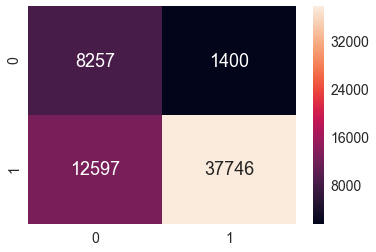

In [213]:
LinearCLASSIFIER(tfidf_w2v_X_train_svm,Y_train_svm,tfidf_w2v_X_test_svm,Y_test_svm)

# KernelCLASSIFIER FOR TFIDF WORD2Vec

In [91]:
X_train_svc,X_test_svc,Y_train_svc,Y_test_svc=train_test_split(final_tfidf_sample_svc,final_score_svc,test_size=0.3,shuffle=False)

In [92]:
from sklearn import preprocessing
tfidf_w2v_X_train_svc= preprocessing.normalize(X_train_svc)
tfidf_w2v_X_test_svc = preprocessing.normalize(X_test_svc)

In [93]:
len(X_train_svc)

35000

# Randomized SEARCH HYPERPARAMETER

In [108]:
BestHyperparameterR1 = bestParamR(tfidf_w2v_X_train_svc,Y_train_svc,tfidf_w2v_X_test_svc,Y_test_svc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 41.8min finished


In [109]:
print(BestHyperparameterR1)

{'gamma': 1, 'C': 0.001}


# kernel Classifier for tfidf word 2 vec

 accuracy with C = 0.001  is  80.99
F1 score with C = 0.001  is  66.04
Recall with C = 0.001  is  72.54
Precision with C = 0.001  is  63.91

 Classification report  with C = 0.001  is 
               precision    recall  f1-score   support

   negative       0.34      0.61      0.44      1787
   positive       0.94      0.84      0.89     13213

avg / total       0.87      0.81      0.83     15000

****************************
TRAINING SCORE IS: 0.8232285714285714
****************************
TEST SCORE IS: 0.8099333333333333


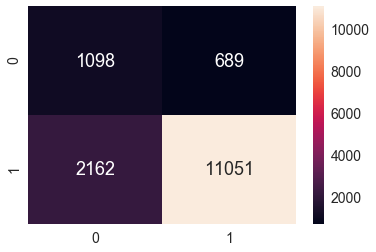

In [163]:
SVMCLASSIFIER(tfidf_w2v_X_train_svc,Y_train_svc,tfidf_w2v_X_test_svc,Y_test_svc,1,0.001) #random search cv

In [37]:
savetofile(tfidf_sent_vectors,"tfidf_sent_vectors")
savetofile(sent_vectors,"sent_vectors")


# OBSERVATION TABLE

# PERFORMANCE OF KERNEL SVM

| VECTORIZER | C | gamma | Train Score | Test Score
| --- | --- | --- | --- | --- |
| BOW | 1 | 1 | 0.99 | 0.92 |
| tfidf | 10 | 0.1 | 0.96 | 0.90 |
| AVG w2v  | 1000 | 0.5 | 0.99 | 0.89 |
| tfidf w2v | 0.001 | 1 | 0.82 | 0.80 |


# PERFORMANCE OF LINEAR SVM

| VECTORIZER | Train Score | Test Score
| --- | --- | --- |
| BOW | 0.87 | 0.86 |
| tfidf | 0.87 | 0.85 |
| AVG w2v  | 0.83 | 0.81 |
| tfidf w2v | 0.78 | 0.76 |
